In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
data=pd.read_csv('ML_Data_48.csv')

In [3]:
data=data.drop(['Z_jerk_mean', 'X_jerk_mean', 'total_jerk_mean', 'Y_jerk_mean','X_jerk_mean','X_jerk_min', 'X_min', 'timestamp_range'], axis=1)

In [4]:
data.columns

Index(['label', 'X_max', 'X_range', 'X_mean', 'X_rms', 'X_std', 'Y_min',
       'Y_max', 'Y_range', 'Y_mean', 'Y_rms', 'Y_std', 'Z_min', 'Z_max',
       'Z_range', 'Z_mean', 'Z_rms', 'Z_std', 'X_jerk_max', 'X_jerk_range',
       'X_jerk_rms', 'X_jerk_std', 'Y_jerk_min', 'Y_jerk_max', 'Y_jerk_range',
       'Y_jerk_rms', 'Y_jerk_std', 'Z_jerk_min', 'Z_jerk_max', 'Z_jerk_range',
       'Z_jerk_rms', 'Z_jerk_std', 'total_jerk_min', 'total_jerk_max',
       'total_jerk_range', 'total_jerk_rms', 'total_jerk_std', 'SMA',
       'X_entropy', 'Y_entropy', 'Z_entropy'],
      dtype='object')

In [5]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [6]:
x=data.drop(['label'], axis=1)
y=data['label']

In [7]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [8]:
x_train, x_t, y_train, y_t= train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape, x_t.shape

((2614, 40), (1121, 40))

In [9]:
x_val, x_test, y_val, y_test= train_test_split(x_t, y_t, test_size=0.15, random_state=42)
x_val.shape, x_test.shape

((952, 40), (169, 40))

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD

2024-12-28 04:50:50.286091: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-28 04:50:50.287812: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-28 04:50:50.313336: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-28 04:50:50.313364: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-28 04:50:50.313381: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [11]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
model = Sequential([
    Dense(1024, activation='relu'),
    Dense(8, activation='softmax')
])

In [13]:
model.compile(optimizer=Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train,
                                epochs=300,
                                batch_size=64,
                                validation_data= (x_val, y_val),
                                verbose=2)

Epoch 1/300
41/41 - 1s - loss: 1.5807 - accuracy: 0.4399 - val_loss: 1.4085 - val_accuracy: 0.5021 - 535ms/epoch - 13ms/step
Epoch 2/300
41/41 - 0s - loss: 1.2695 - accuracy: 0.5425 - val_loss: 1.2373 - val_accuracy: 0.5767 - 67ms/epoch - 2ms/step
Epoch 3/300
41/41 - 0s - loss: 1.1485 - accuracy: 0.5891 - val_loss: 1.1522 - val_accuracy: 0.5851 - 69ms/epoch - 2ms/step
Epoch 4/300
41/41 - 0s - loss: 1.0687 - accuracy: 0.6251 - val_loss: 1.0969 - val_accuracy: 0.6124 - 67ms/epoch - 2ms/step
Epoch 5/300
41/41 - 0s - loss: 1.0086 - accuracy: 0.6546 - val_loss: 1.0565 - val_accuracy: 0.6418 - 66ms/epoch - 2ms/step
Epoch 6/300
41/41 - 0s - loss: 0.9525 - accuracy: 0.6683 - val_loss: 1.0025 - val_accuracy: 0.6418 - 65ms/epoch - 2ms/step
Epoch 7/300
41/41 - 0s - loss: 0.9154 - accuracy: 0.6748 - val_loss: 0.9824 - val_accuracy: 0.6429 - 71ms/epoch - 2ms/step
Epoch 8/300
41/41 - 0s - loss: 0.8801 - accuracy: 0.6836 - val_loss: 0.9423 - val_accuracy: 0.6765 - 63ms/epoch - 2ms/step
Epoch 9/300
41

Epoch 68/300
41/41 - 0s - loss: 0.2830 - accuracy: 0.9143 - val_loss: 0.7391 - val_accuracy: 0.7773 - 61ms/epoch - 1ms/step
Epoch 69/300
41/41 - 0s - loss: 0.2774 - accuracy: 0.9174 - val_loss: 0.7265 - val_accuracy: 0.7752 - 60ms/epoch - 1ms/step
Epoch 70/300
41/41 - 0s - loss: 0.2837 - accuracy: 0.9208 - val_loss: 0.7509 - val_accuracy: 0.7773 - 59ms/epoch - 1ms/step
Epoch 71/300
41/41 - 0s - loss: 0.2673 - accuracy: 0.9227 - val_loss: 0.7451 - val_accuracy: 0.7826 - 58ms/epoch - 1ms/step
Epoch 72/300
41/41 - 0s - loss: 0.2645 - accuracy: 0.9258 - val_loss: 0.7190 - val_accuracy: 0.7826 - 67ms/epoch - 2ms/step
Epoch 73/300
41/41 - 0s - loss: 0.2503 - accuracy: 0.9308 - val_loss: 0.7405 - val_accuracy: 0.7815 - 60ms/epoch - 1ms/step
Epoch 74/300
41/41 - 0s - loss: 0.2497 - accuracy: 0.9311 - val_loss: 0.7452 - val_accuracy: 0.7805 - 60ms/epoch - 1ms/step
Epoch 75/300
41/41 - 0s - loss: 0.2597 - accuracy: 0.9250 - val_loss: 0.7722 - val_accuracy: 0.7731 - 60ms/epoch - 1ms/step
Epoch 76

Epoch 134/300
41/41 - 0s - loss: 0.1220 - accuracy: 0.9675 - val_loss: 0.8404 - val_accuracy: 0.8067 - 71ms/epoch - 2ms/step
Epoch 135/300
41/41 - 0s - loss: 0.1211 - accuracy: 0.9713 - val_loss: 0.8634 - val_accuracy: 0.7962 - 66ms/epoch - 2ms/step
Epoch 136/300
41/41 - 0s - loss: 0.1126 - accuracy: 0.9702 - val_loss: 0.8563 - val_accuracy: 0.8025 - 69ms/epoch - 2ms/step
Epoch 137/300
41/41 - 0s - loss: 0.1266 - accuracy: 0.9652 - val_loss: 0.8766 - val_accuracy: 0.7910 - 71ms/epoch - 2ms/step
Epoch 138/300
41/41 - 0s - loss: 0.1132 - accuracy: 0.9713 - val_loss: 0.8490 - val_accuracy: 0.8004 - 72ms/epoch - 2ms/step
Epoch 139/300
41/41 - 0s - loss: 0.1156 - accuracy: 0.9713 - val_loss: 0.8867 - val_accuracy: 0.7868 - 69ms/epoch - 2ms/step
Epoch 140/300
41/41 - 0s - loss: 0.1193 - accuracy: 0.9679 - val_loss: 0.8713 - val_accuracy: 0.8015 - 68ms/epoch - 2ms/step
Epoch 141/300
41/41 - 0s - loss: 0.1132 - accuracy: 0.9728 - val_loss: 0.8767 - val_accuracy: 0.8078 - 71ms/epoch - 2ms/step


Epoch 200/300
41/41 - 0s - loss: 0.0617 - accuracy: 0.9870 - val_loss: 0.9876 - val_accuracy: 0.7962 - 54ms/epoch - 1ms/step
Epoch 201/300
41/41 - 0s - loss: 0.0718 - accuracy: 0.9809 - val_loss: 1.0509 - val_accuracy: 0.7994 - 55ms/epoch - 1ms/step
Epoch 202/300
41/41 - 0s - loss: 0.0650 - accuracy: 0.9839 - val_loss: 0.9978 - val_accuracy: 0.7962 - 53ms/epoch - 1ms/step
Epoch 203/300
41/41 - 0s - loss: 0.0617 - accuracy: 0.9874 - val_loss: 1.0259 - val_accuracy: 0.7910 - 55ms/epoch - 1ms/step
Epoch 204/300
41/41 - 0s - loss: 0.0718 - accuracy: 0.9820 - val_loss: 0.9864 - val_accuracy: 0.8004 - 54ms/epoch - 1ms/step
Epoch 205/300
41/41 - 0s - loss: 0.0618 - accuracy: 0.9881 - val_loss: 1.0089 - val_accuracy: 0.7889 - 54ms/epoch - 1ms/step
Epoch 206/300
41/41 - 0s - loss: 0.0618 - accuracy: 0.9855 - val_loss: 1.0129 - val_accuracy: 0.7983 - 54ms/epoch - 1ms/step
Epoch 207/300
41/41 - 0s - loss: 0.0608 - accuracy: 0.9862 - val_loss: 1.0081 - val_accuracy: 0.8036 - 56ms/epoch - 1ms/step


Epoch 266/300
41/41 - 0s - loss: 0.0434 - accuracy: 0.9904 - val_loss: 1.1050 - val_accuracy: 0.8025 - 52ms/epoch - 1ms/step
Epoch 267/300
41/41 - 0s - loss: 0.0417 - accuracy: 0.9908 - val_loss: 1.1066 - val_accuracy: 0.8025 - 54ms/epoch - 1ms/step
Epoch 268/300
41/41 - 0s - loss: 0.0379 - accuracy: 0.9916 - val_loss: 1.1134 - val_accuracy: 0.7973 - 55ms/epoch - 1ms/step
Epoch 269/300
41/41 - 0s - loss: 0.0467 - accuracy: 0.9893 - val_loss: 1.1388 - val_accuracy: 0.7910 - 65ms/epoch - 2ms/step
Epoch 270/300
41/41 - 0s - loss: 0.0657 - accuracy: 0.9809 - val_loss: 1.1514 - val_accuracy: 0.8067 - 59ms/epoch - 1ms/step
Epoch 271/300
41/41 - 0s - loss: 0.0517 - accuracy: 0.9855 - val_loss: 1.1392 - val_accuracy: 0.7910 - 53ms/epoch - 1ms/step
Epoch 272/300
41/41 - 0s - loss: 0.0435 - accuracy: 0.9878 - val_loss: 1.1079 - val_accuracy: 0.8078 - 53ms/epoch - 1ms/step
Epoch 273/300
41/41 - 0s - loss: 0.0428 - accuracy: 0.9901 - val_loss: 1.1207 - val_accuracy: 0.8057 - 53ms/epoch - 1ms/step


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              41984     
                                                                 
 dense_1 (Dense)             (None, 8)                 8200      
                                                                 
Total params: 50184 (196.03 KB)
Trainable params: 50184 (196.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


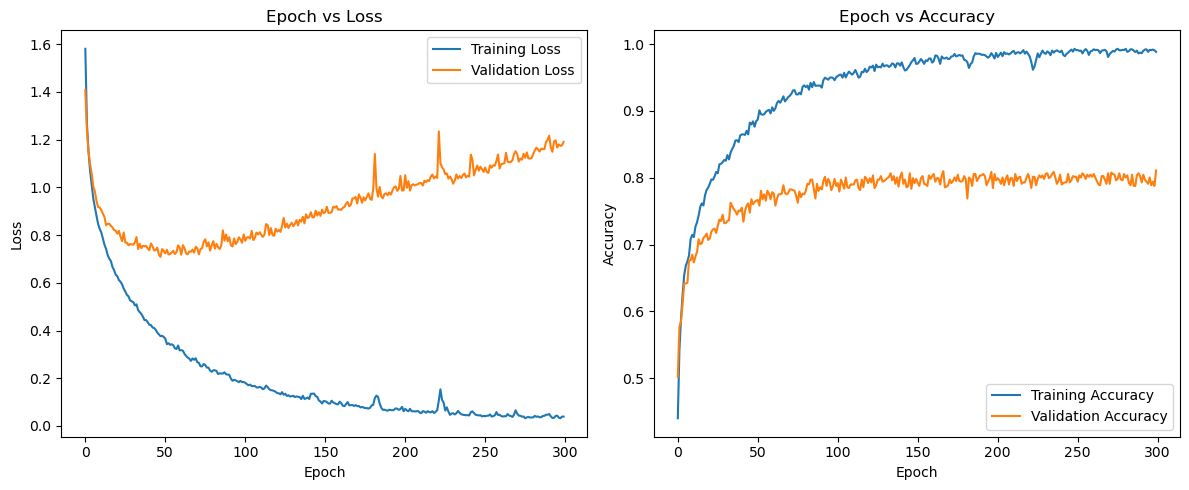

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 99.16%
Test Accuracy: 80.47%


6/6 [==============================] - 0s 754us/step


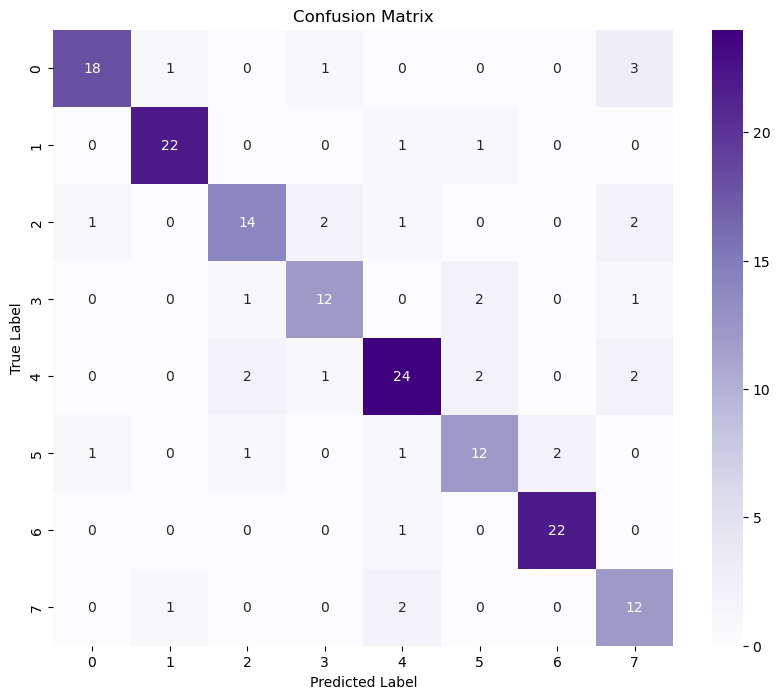

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84        23
           1       0.92      0.92      0.92        24
           2       0.78      0.70      0.74        20
           3       0.75      0.75      0.75        16
           4       0.80      0.77      0.79        31
           5       0.71      0.71      0.71        17
           6       0.92      0.96      0.94        23
           7       0.60      0.80      0.69        15

    accuracy                           0.80       169
   macro avg       0.80      0.80      0.79       169
weighted avg       0.81      0.80      0.81       169



In [18]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  
else:
    y_true = np.argmax(y_test, axis=1)  


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(len(np.unique(y_true)))])
print("Classification Report:")
print(class_report)
